
# Twitter Sentiment Analysis

DataSet: 
    Downloaded from Kaggle: https://www.kaggle.com/datasets/amirhosseinnaghshzan/twitter-2022?resource=download
            

In [3]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
# Import the required libraries
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
from textblob import TextBlob
import nltk
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings 

In [5]:
# Read and Load the Tweets.csv file
df_tweets=pd.read_csv('twitterdataset22.csv',
                   encoding='utf-8' , encoding_errors='ignore')

### Exploratory Data Analysis (EDA)

In [6]:
# Display the five top records of the Tweetes.cvs
df_tweets.head()

url  \
0  https://twitter.com/LaTera__/status/1477429429...   
1  https://twitter.com/allirica_rose/status/14774...   
2  https://twitter.com/matrixlms/status/147742942...   
3  https://twitter.com/AnarkyIsMe/status/14774294...   
4  https://twitter.com/__amyya/status/14774294292...   

                        date  \
0  2022-01-01 23:59:59+00:00   
1  2022-01-01 23:59:59+00:00   
2  2022-01-01 23:59:59+00:00   
3  2022-01-01 23:59:59+00:00   
4  2022-01-01 23:59:59+00:00   

                                             content likeCount replyCount  \
0               I’m getting a sugar daddy this year!         0         10   
1  might make em french toast after and spoon a l...         1          0   
2  Our platform can be matched to your company’s ...         0          0   
3  Oh my God this first song. I can't with how am...         5          2   
4                                Happy new year ! 😚🎉         1          0   

  retweetCount   viewCount quoteCount          sourceLabel  \
0            0  210.006559          0   Twitter for iPhone   
1            0  191.910011          0   Twitter for iPhone   
2            0  210.006559          0              HubSpot   
3            0  542.144594          0  Twitter for Android   
4            0  191.910011          0   Twitter for iPhone   

                                               links  ... vibe       username  \
0                                                NaN  ...  NaN       LaTera__   
1                                                NaN  ...  NaN  allirica_rose   
2  [TextLink(text='hubs.ly/Q011g-C00', url='https...  ...  NaN      matrixlms   
3  [TextLink(text='youtu.be/tA0-WXsm-T0', url='ht...  ...  NaN     AnarkyIsMe   
4                                                NaN  ...  NaN        __amyya   

                                     UserDescription UserFavouritesCount  \
0                     NCAT Alumna |🪬 | | For giggles               54402   
1  writer, reader, horror lover, general disaster...               12135   
2  An innovative way to train and learn. \nSign u...                2145   
3  Vegan activist trying to make a change in the ...                8130   
4                                              5♥5♥5               39943   

  followersCount friendsCount         location verified protected mediaCount  
0           1955          740        Michigan     False     False       2636  
1             65           98              NaN    False     False        375  
2          10074        10523  Plano, TX 75024    False     False       8275  
3           1507         1092          Earth 🌍    False     False       1760  
4            590          179  Lost in thought    False     False        625  

[5 rows x 28 columns]

In [7]:
# Display the last five records 
df_tweets.tail()

url  \
1048570  https://twitter.com/SMOOVmuzik/status/15651272...   
1048571  https://twitter.com/therealnopixxs/status/1565...   
1048572  https://twitter.com/goodnessno/status/15651272...   
1048573  https://twitter.com/egirlfemboi/status/1565127...   
1048574  https://twitter.com/HannaBarberaCap/status/156...   

                              date  \
1048570  2022-08-31 23:59:58+00:00   
1048571  2022-08-31 23:59:58+00:00   
1048572  2022-08-31 23:59:58+00:00   
1048573  2022-08-31 23:59:58+00:00   
1048574  2022-08-31 23:59:58+00:00   

                                                   content likeCount  \
1048570  Can’t wait to coach my sons sports team if he ...         3   
1048571                            i need a fucking snack1         1   
1048572  Liz is not going quietly! Bet there is much mo...         1   
1048573  Gonna get ridiculously high, eat a giant sandw...        10   
1048574  QT or RT your opinions on the Scooby-Doo shows...        76   

        replyCount retweetCount    viewCount quoteCount          sourceLabel  \
1048570          0            0   377.618452          0   Twitter for iPhone   
1048571          2            0   191.910011          0   Twitter for iPhone   
1048572          0            0   191.910011          0  Twitter for Android   
1048573          2            0  1120.543852          0   Twitter for iPhone   
1048574          4           14  5614.125289          7   Twitter for iPhone   

        links  ... vibe         username  \
1048570   NaN  ...  NaN       SMOOVmuzik   
1048571   NaN  ...  NaN   therealnopixxs   
1048572   NaN  ...  NaN       goodnessno   
1048573   NaN  ...  NaN      egirlfemboi   
1048574   NaN  ...  NaN  HannaBarberaCap   

                                           UserDescription  \
1048570                                          🅵🅻🅰🆅🆅🆅 ♒️   
1048571                                                NaN   
1048572  🌊Liberalism is trust of the people tempered by...   
1048573  Marceline 35 they/she trans non-binary pan pol...   
1048574  Yabba Dabba Doo! bringing Hanna-Barbera back a...   

        UserFavouritesCount followersCount friendsCount  \
1048570                1859            287          614   
1048571               11786            526          737   
1048572               76419            627         1651   
1048573               27829            346         1068   
1048574               46126         132632         2989   

                        location verified protected mediaCount  
1048570               Texas, USA    False     False        155  
1048571                      NaN    False     False         59  
1048572            United States    False     False        185  
1048573             Lakewood, OH    False     False        775  
1048574  Cartoon Network Studios    False     False      10256  

[5 rows x 28 columns]

In [8]:
#  Display the shape of data(rows and columns)
df_tweets.shape

(1048575, 28)

In [9]:
# Display the dataframe tweets header
df_tweets.columns

Index(['url', 'date', 'content', 'likeCount', 'replyCount', 'retweetCount',
       'viewCount', 'quoteCount', 'sourceLabel', 'links', 'media',
       'quotedTweet', 'mentionedUsers', 'coordinates', 'place', 'hashtags',
       'cashtags', 'card', 'vibe', 'username', 'UserDescription',
       'UserFavouritesCount', 'followersCount', 'friendsCount', 'location',
       'verified', 'protected', 'mediaCount'],
      dtype='object')

 Filter the dataset from irrlevant columns, only 'Tweets' which store in 'content' column and 'date' is needed for the analysis

In [10]:
df_tweets = df_tweets.iloc[:,1:3]

In [11]:
df_tweets.head()

date  \
0  2022-01-01 23:59:59+00:00   
1  2022-01-01 23:59:59+00:00   
2  2022-01-01 23:59:59+00:00   
3  2022-01-01 23:59:59+00:00   
4  2022-01-01 23:59:59+00:00   

                                             content  
0               I’m getting a sugar daddy this year!  
1  might make em french toast after and spoon a l...  
2  Our platform can be matched to your company’s ...  
3  Oh my God this first song. I can't with how am...  
4                                Happy new year ! 😚🎉

In [12]:
# Rename 'content' column with 'Tweet' and 'date' with 'Date' for clarity 
df_tweets = df_tweets.rename({'date':'Date',
             'content':'Tweet'}, axis=1)

In [13]:
df_tweets.head()

Date  \
0  2022-01-01 23:59:59+00:00   
1  2022-01-01 23:59:59+00:00   
2  2022-01-01 23:59:59+00:00   
3  2022-01-01 23:59:59+00:00   
4  2022-01-01 23:59:59+00:00   

                                               Tweet  
0               I’m getting a sugar daddy this year!  
1  might make em french toast after and spoon a l...  
2  Our platform can be matched to your company’s ...  
3  Oh my God this first song. I can't with how am...  
4                                Happy new year ! 😚🎉

In [14]:
# Display the data information
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Date    1048575 non-null  object
 1   Tweet   1048575 non-null  object
dtypes: object(2)
memory usage: 16.0+ MB


In [15]:
# Reformat the 'timestamp' in the 'Date'column to '%Y-%m-%d %H:%M:%S'format
df_tweets['Date'] = pd.to_datetime(df_tweets['Date'], format='%Y-%m-%d %H:%M:%S',errors='coerce')
print(df_tweets.dtypes)

Date     datetime64[ns, UTC]
Tweet                 object
dtype: object


In [16]:
# Convert object type of 'date' column to datetime object
df_tweets['Date'] =  pd.to_datetime(df_tweets['Date'])
# Convert UTC datetime to ns
df_tweets['Date'] =  pd.to_datetime(df_tweets['Date']).dt.tz_localize(None)
print(df_tweets.dtypes) 

Date     datetime64[ns]
Tweet            object
dtype: object


In [17]:
# Checking for null values
np.sum(df_tweets.isnull().any(axis=1))

7

The dataset contains 7 null values

In [18]:
# To display the records contains nun values
df_null_rows = df_tweets[df_tweets.isnull().any(axis=1)]
print(df_null_rows) 

       Date    Tweet
160821  NaT        0
165204  NaT        0
170768  NaT        0
547484  NaT  content
708306  NaT        1
712689  NaT        1
718253  NaT        1


In [19]:
#Display the Null Percenatage
null_percentage = (len(df_null_rows) / df_tweets.shape[0]) * 100
print(f"The percentage of null values: {null_percentage:.9f}%")

The percentage of null values: 0.000667573%


Given that the dataset has 104,857,8 rows and 7 null values are considered trivial and have no significant impact on model performance, we can drop the null values from the dataset to ensure that the data used for training or analysis is complete and free of missing values.

In [20]:
df_tweets = df_tweets.dropna()

In [21]:
# Checking for null values
np.sum(df_tweets.isnull().any(axis=1))

0

The dataset has no missing values.

# Data Preprocessing and Cleaning

To prepare tweet texts for training a NLP model, it is necessary to clean the data by applying preprocessing and cleansing techniques to ensure that the text data is suitable for training the model. Let's proceed with the data cleaning process.
<br>
To clean tweet data, you typically follow a series of steps. First, you remove user mentions, hyperlinks, and hashtags as they may not contribute much to the analysis. Then, you eliminate special characters, punctuation, and unnecessary whitespace. Lowercasing the text ensures consistency. Tokenization splits the text into individual words. Removing stopwords helps remove common and insignificant words. Optionally, you can apply stemming or lemmatization to normalize the words. Lastly, you can handle emoticons and abbreviations based on your analysis needs. By performing these steps, you can preprocess tweet data for tasks like sentiment analysis or topic modeling. Adapt the process as per your project requirements and the nature of the tweet data.




### Convert the tweets to Lowercase & Replace any character which is not an uppercase letter, lowercase letter, or digit.

In [22]:
# Put all tweets in lowercase
df_tweets["CleanedTweet"] = df_tweets["Tweet"].str.lower()
# A regular expression [^a-zA-Z0-9] pattern that matches any character that is not an uppercase letter, 
# lowercase letter, or digit.
df_tweets["CleanedTweet"]= df_tweets["CleanedTweet"].str.replace("[^a-zA-Z0-9]", " ")

In [23]:
df_tweets.head()

Date                                              Tweet  \
0 2022-01-01 23:59:59               I’m getting a sugar daddy this year!   
1 2022-01-01 23:59:59  might make em french toast after and spoon a l...   
2 2022-01-01 23:59:59  Our platform can be matched to your company’s ...   
3 2022-01-01 23:59:59  Oh my God this first song. I can't with how am...   
4 2022-01-01 23:59:59                                Happy new year ! 😚🎉   

                                        CleanedTweet  
0               i m getting a sugar daddy this year   
1  might make em french toast after and spoon a l...  
2  our platform can be matched to your company s ...  
3  oh my god this first song  i can t with how am...  
4                                happy new year

#### Removing the punctuations

In [24]:
# import a string module, to provide a set of common string operations and constants.
import string

# Store the string.punctuation into an object punct
punct = string.punctuation 

In [25]:
# Define the list of English punctuations
punctuations_list = list(punct) 
print(punctuations_list)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [26]:
# Function to clean punctuations from text
def cleaning_punctuations(text):
    translator = str.maketrans('', '', ''.join(punctuations_list))
    return text.translate(translator)

# Apply the cleaning_punctuations() function to the 'text' column in the dataset
df_tweets['CleanedTweet'] = df_tweets['CleanedTweet'].apply(lambda x: cleaning_punctuations(x)) 

In [27]:
# Display the updated dataframe
df_tweets.head()

Date                                              Tweet  \
0 2022-01-01 23:59:59               I’m getting a sugar daddy this year!   
1 2022-01-01 23:59:59  might make em french toast after and spoon a l...   
2 2022-01-01 23:59:59  Our platform can be matched to your company’s ...   
3 2022-01-01 23:59:59  Oh my God this first song. I can't with how am...   
4 2022-01-01 23:59:59                                Happy new year ! 😚🎉   

                                        CleanedTweet  
0               i m getting a sugar daddy this year   
1  might make em french toast after and spoon a l...  
2  our platform can be matched to your company s ...  
3  oh my god this first song  i can t with how am...  
4                                happy new year

#### Cleaning Numeric characters

In [28]:
# clean numeric characters from the 'Cleanedtweet' column
def cleaning_numeric(text):
    return re.sub('[0-9]+','',text)

In [29]:
# Apply the cleaning_numeric() function to the 'CleanedTweet' column in the dataset
df_tweets['CleanedTweet'] = df_tweets['CleanedTweet'].apply(lambda x: cleaning_numeric(x))
df_tweets.head()


Date                                              Tweet  \
0 2022-01-01 23:59:59               I’m getting a sugar daddy this year!   
1 2022-01-01 23:59:59  might make em french toast after and spoon a l...   
2 2022-01-01 23:59:59  Our platform can be matched to your company’s ...   
3 2022-01-01 23:59:59  Oh my God this first song. I can't with how am...   
4 2022-01-01 23:59:59                                Happy new year ! 😚🎉   

                                        CleanedTweet  
0               i m getting a sugar daddy this year   
1  might make em french toast after and spoon a l...  
2  our platform can be matched to your company s ...  
3  oh my god this first song  i can t with how am...  
4                                happy new year

#### Removing the URLs

In [30]:
# clean URLs from the 'Cleanedtweet' column
def cleaning_URLs (text):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ', text)

In [31]:
# Apply the cleaning_repeating_char() function to the 'CleanedTweet' column in the dataset
df_tweets['CleanedTweet'] = df_tweets['CleanedTweet'].apply(lambda x: cleaning_URLs(x))
df_tweets.head()

Date                                              Tweet  \
0 2022-01-01 23:59:59               I’m getting a sugar daddy this year!   
1 2022-01-01 23:59:59  might make em french toast after and spoon a l...   
2 2022-01-01 23:59:59  Our platform can be matched to your company’s ...   
3 2022-01-01 23:59:59  Oh my God this first song. I can't with how am...   
4 2022-01-01 23:59:59                                Happy new year ! 😚🎉   

                                        CleanedTweet  
0               i m getting a sugar daddy this year   
1  might make em french toast after and spoon a l...  
2  our platform can be matched to your company s ...  
3  oh my god this first song  i can t with how am...  
4                                happy new year

### Remove Stop words

StopWords: Stopwords are words in English that are frequently used but typically do not contribute much to the overall meaning of a sentence. These words are often removed before classification or analysis tasks. Some examples of stopwords include "a", "an", "the", "in", "on", "is", "are", and so on. Removing stopwords helps reduce noise and improve the accuracy of text analysis and classification models.

In [32]:
# Import the stopwords corpus from the Natural Language Toolkit (NLTK) library and download the stopwords data.
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Reham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
# Store the stopwords into the object named as "stop_words"
stop_words = stopwords.words('english')

# Diplay the list of all words stored in stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [34]:
# Removing the stop words listed above from the 'Tweet' column
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

In [35]:
# Apply the function to the 'Tweet' column in the dataframe
df_tweets['CleanedTweet'] = df_tweets['CleanedTweet'].apply(lambda text: cleaning_stopwords(text)) 

In [36]:
df_tweets.head(10)

Date                                              Tweet  \
0 2022-01-01 23:59:59               I’m getting a sugar daddy this year!   
1 2022-01-01 23:59:59  might make em french toast after and spoon a l...   
2 2022-01-01 23:59:59  Our platform can be matched to your company’s ...   
3 2022-01-01 23:59:59  Oh my God this first song. I can't with how am...   
4 2022-01-01 23:59:59                                Happy new year ! 😚🎉   
5 2022-01-01 23:59:59  Seeing John Oliver at the Kennedy center! http...   
6 2022-01-01 23:59:59  Everyone should go watch Nuclear Family on HBO...   
7 2022-01-01 23:59:59                          Real pero real real! 🤣🤣🤣🤣   
8 2022-01-01 23:59:59  Dear diary,\n\nShe tried to steal my notebook,...   
9 2022-01-01 23:59:59  Last year was wild. But damn, I understood mys...   

                                        CleanedTweet  
0                           getting sugar daddy year  
1            might make em french toast spoon little  
2  platform matched company brand adding personal...  
3  oh god first song amazing chick live hitting n...  
4                                     happy new year  
5  seeing john oliver kennedy center https co fdw...  
6  everyone go watch nuclear family hbo amazing a...  
7                                real pero real real  
8  dear diary tried steal notebook put name give ...  
9  last year wild damn understood became spiritua...

<b>Stemming and lemmatization</b> are techniques used to reduce words to their base or root forms in order to handle different variations of a word and achieve a common representation. 

Here's a summary of both techniques: 
<b>Stemming:</b> Stemming involves removing prefixes, suffixes, and other word endings from a word to obtain its core form. The goal is to approximate the base form of a word, even if the resulting stem is not always a valid word itself. Stemming is a heuristic process and can sometimes lead to inaccuracies or produce stems that are not actual words.

<b>Lemmatization:</b> Lemmatization, on the other hand, aims to determine the base or dictionary form (known as the lemma) of a word using vocabulary and morphological analysis. It considers the part of speech of the word and applies linguistic rules to derive the lemma while preserving the word's meaning. Lemmatization typically produces valid words as lemmas and is a more precise process compared to stemming. Stemming and lemmatization are optionals to use.

There are various stemmers we can use, such as PorterStemmer, SnowballStemmer, LancasterStemmer etc. SnowballStemmer is the most common. 

![Stemminglemmatization.png](StemmingLemmatization.png)

#### Applying stemming to the tweet

In [37]:
# imports the PorterStemmer class from NLTK, which is used for reducing words to their base form by removing suffixes
# and helps in standardizing and normalizing words in text data.
from nltk.stem import PorterStemmer, SnowballStemmer

In [38]:
# Initialise an object using a method PorterStemmer
# stemmer = PorterStemmer()                             
stemmer = SnowballStemmer('english')

In [39]:
# # Function to apply stemming on text
def stemming_on_text(data):
    text = [stemmer.stem(word) for word in data ]
    return data   

In [40]:
# df_tweets['Tweet'][0]

In [41]:
# from nltk.tokenize import word_tokenize

tweet_text = df_tweets['Tweet'][4]
stemmed_words = stemming_on_text(tweet_text)

print(stemmed_words)
tweet_text

Happy new year ! 😚🎉


'Happy new year ! 😚🎉'

In [42]:
# # Apply the stemming_on_text() function to the 'text' column in the dataset
df_tweets['CleanedTweet']= df_tweets['CleanedTweet'].apply (lambda x: stemming_on_text(x))
df_tweets.head()

Date                                              Tweet  \
0 2022-01-01 23:59:59               I’m getting a sugar daddy this year!   
1 2022-01-01 23:59:59  might make em french toast after and spoon a l...   
2 2022-01-01 23:59:59  Our platform can be matched to your company’s ...   
3 2022-01-01 23:59:59  Oh my God this first song. I can't with how am...   
4 2022-01-01 23:59:59                                Happy new year ! 😚🎉   

                                        CleanedTweet  
0                           getting sugar daddy year  
1            might make em french toast spoon little  
2  platform matched company brand adding personal...  
3  oh god first song amazing chick live hitting n...  
4                                     happy new year

#### Applying lemmatizer to the tweet

In [43]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Reham\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [44]:
# # Create an instance of the WordNetLemmatizer
lm = WordNetLemmatizer()

# Function to apply lemmatization on text
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data 

In [45]:
# # Apply the stemming_on_text() function to the 'text' column in the dataset
df_tweets['CleanedTweet']= df_tweets['CleanedTweet'].apply(lambda x: lemmatizer_on_text(x))
df_tweets.head()

Date                                              Tweet  \
0 2022-01-01 23:59:59               I’m getting a sugar daddy this year!   
1 2022-01-01 23:59:59  might make em french toast after and spoon a l...   
2 2022-01-01 23:59:59  Our platform can be matched to your company’s ...   
3 2022-01-01 23:59:59  Oh my God this first song. I can't with how am...   
4 2022-01-01 23:59:59                                Happy new year ! 😚🎉   

                                        CleanedTweet  
0                           getting sugar daddy year  
1            might make em french toast spoon little  
2  platform matched company brand adding personal...  
3  oh god first song amazing chick live hitting n...  
4                                     happy new year

### Tokenization

<b>Tokenization</b>: is the process of breaking a sequence of characters or words into smaller units, known as tokens. It involves dividing the text into meaningful chunks while potentially removing certain characters like punctuation. This task is commonly referred to as tokenization and serves as a fundamental step in text processing and analysis.
<br><br>
A <b>tokenizer</b> is used to create tokens for each word in a given dataset corpus and map them to corresponding indices using a dictionary. The dictionary, typically referred to as <b>word_index</b>, contains the index value for each unique word in the corpus. On the other hand, <b>vocab_size</b> represents the total count of unique words present in the corpus, indicating the size of the vocabulary. In summary, the tokenizer assigns numerical indices to words in the corpus, allowing for easier representation and processing of text data.

In [46]:
# Define the tokenizer function
def tokenize(text):
    tokens = re.split("\W+", text)
    return tokens 

In [47]:
df_tweets['TweetToken']= df_tweets['CleanedTweet'].apply (lambda x: tokenize(x.lower()))
df_tweets.head()

Date                                              Tweet  \
0 2022-01-01 23:59:59               I’m getting a sugar daddy this year!   
1 2022-01-01 23:59:59  might make em french toast after and spoon a l...   
2 2022-01-01 23:59:59  Our platform can be matched to your company’s ...   
3 2022-01-01 23:59:59  Oh my God this first song. I can't with how am...   
4 2022-01-01 23:59:59                                Happy new year ! 😚🎉   

                                        CleanedTweet  \
0                           getting sugar daddy year   
1            might make em french toast spoon little   
2  platform matched company brand adding personal...   
3  oh god first song amazing chick live hitting n...   
4                                     happy new year   

                                          TweetToken  
0                      [getting, sugar, daddy, year]  
1    [might, make, em, french, toast, spoon, little]  
2  [platform, matched, company, brand, adding, pe...  
3  [oh, god, first, song, amazing, chick, live, h...  
4                                 [happy, new, year]

In [48]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048568 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   Date          1048568 non-null  datetime64[ns]
 1   Tweet         1048568 non-null  object        
 2   CleanedTweet  1048568 non-null  object        
 3   TweetToken    1048568 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 40.0+ MB


In [49]:
# Save The cleaned file to 'Cleantweets_WithoutSentiment.csv'
df_tweets.to_csv('Cleantweets_WithoutSentiment.csv', index=False)

## Calculate polarity and subjectivity for the Tweets

To obtain the polarity and subjectivity scores for all tweets, the need to import the TextBlob library is required in order to leverage its sentiment analysis capabilities. The sentiment or emotional tone of the text is indicated by the sentiment score known as polarity. This score range between -1 to 1, where -1 representing a strongly negative attitude, 0 representing  neutral sentiment, and 1 representing  a strongly positive mood. The subjectivity score ranges from 0 to 1, with 0 being an objective or factual statement and 1 denoting a subjective or opinionated remark. It assesses the degree of subjectivity in the text.  

In [50]:
# Get the tweets subjectivity
def determineTextSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [51]:
# Get the tweets polarity
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity 

In [52]:
# Add two columns for subjectivity and polarity
df_tweets['Subjectivity']= df_tweets['CleanedTweet'].apply(determineTextSubjectivity)
df_tweets['Polarity']= df_tweets['CleanedTweet'].apply(getTextPolarity) 

In [53]:
# Display the top 15 record from the dataframe
df_tweets.head(15)

Date                                              Tweet  \
0  2022-01-01 23:59:59               I’m getting a sugar daddy this year!   
1  2022-01-01 23:59:59  might make em french toast after and spoon a l...   
2  2022-01-01 23:59:59  Our platform can be matched to your company’s ...   
3  2022-01-01 23:59:59  Oh my God this first song. I can't with how am...   
4  2022-01-01 23:59:59                                Happy new year ! 😚🎉   
5  2022-01-01 23:59:59  Seeing John Oliver at the Kennedy center! http...   
6  2022-01-01 23:59:59  Everyone should go watch Nuclear Family on HBO...   
7  2022-01-01 23:59:59                          Real pero real real! 🤣🤣🤣🤣   
8  2022-01-01 23:59:59  Dear diary,\n\nShe tried to steal my notebook,...   
9  2022-01-01 23:59:59  Last year was wild. But damn, I understood mys...   
10 2022-01-01 23:59:59  “Never limit yourself because of others’ limit...   
11 2022-01-01 23:59:59                      quack https://t.co/M8iVui1wDf   
12 2022-01-01 23:59:59  cry as much as you can, its a competition, and...   
13 2022-01-01 23:59:59  Go to the barbershop and cut my name in you ha...   
14 2022-01-01 23:59:59  i won jackbox the other day https://t.co/4y4jK...   

                                         CleanedTweet  \
0                            getting sugar daddy year   
1             might make em french toast spoon little   
2   platform matched company brand adding personal...   
3   oh god first song amazing chick live hitting n...   
4                                      happy new year   
5   seeing john oliver kennedy center https co fdw...   
6   everyone go watch nuclear family hbo amazing a...   
7                                 real pero real real   
8   dear diary tried steal notebook put name give ...   
9   last year wild damn understood became spiritua...   
10  never limit others limited imagination never l...   
11                            quack https co mivuiwdf   
12             cry much competition step im gonna win   
13             go barbershop cut name hair kinda love   
14                       jackbox day https co yjksqej   

                                           TweetToken  Subjectivity  Polarity  
0                       [getting, sugar, daddy, year]      0.000000  0.000000  
1     [might, make, em, french, toast, spoon, little]      0.250000 -0.093750  
2   [platform, matched, company, brand, adding, pe...      0.000000  0.000000  
3   [oh, god, first, song, amazing, chick, live, h...      0.577778  0.328788  
4                                  [happy, new, year]      0.727273  0.468182  
5   [seeing, john, oliver, kennedy, center, https,...      0.100000 -0.100000  
6   [everyone, go, watch, nuclear, family, hbo, am...      0.600000  0.400000  
7                            [real, pero, real, real]      0.375000  0.250000  
8   [dear, diary, tried, steal, notebook, put, nam...      0.000000  0.000000  
9   [last, year, wild, damn, understood, became, s...      0.273160  0.032468  
10  [never, limit, others, limited, imagination, n...      0.142857 -0.071429  
11                       [quack, https, co, mivuiwdf]      0.000000  0.000000  
12     [cry, much, competition, step, im, gonna, win]      0.300000  0.500000  
13     [go, barbershop, cut, name, hair, kinda, love]      0.600000  0.500000  
14                 [jackbox, day, https, co, yjksqej]      0.000000  0.000000

All the values of polarity are between -1 and 1, while for subjectivity, it range from 0:1 

In [54]:
# Get the tweets sentiment
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"    

In [55]:
df_tweets['Sentiment'] = df_tweets['Polarity'].apply(getTextAnalysis)

In [56]:
df_tweets.head(15)

Date                                              Tweet  \
0  2022-01-01 23:59:59               I’m getting a sugar daddy this year!   
1  2022-01-01 23:59:59  might make em french toast after and spoon a l...   
2  2022-01-01 23:59:59  Our platform can be matched to your company’s ...   
3  2022-01-01 23:59:59  Oh my God this first song. I can't with how am...   
4  2022-01-01 23:59:59                                Happy new year ! 😚🎉   
5  2022-01-01 23:59:59  Seeing John Oliver at the Kennedy center! http...   
6  2022-01-01 23:59:59  Everyone should go watch Nuclear Family on HBO...   
7  2022-01-01 23:59:59                          Real pero real real! 🤣🤣🤣🤣   
8  2022-01-01 23:59:59  Dear diary,\n\nShe tried to steal my notebook,...   
9  2022-01-01 23:59:59  Last year was wild. But damn, I understood mys...   
10 2022-01-01 23:59:59  “Never limit yourself because of others’ limit...   
11 2022-01-01 23:59:59                      quack https://t.co/M8iVui1wDf   
12 2022-01-01 23:59:59  cry as much as you can, its a competition, and...   
13 2022-01-01 23:59:59  Go to the barbershop and cut my name in you ha...   
14 2022-01-01 23:59:59  i won jackbox the other day https://t.co/4y4jK...   

                                         CleanedTweet  \
0                            getting sugar daddy year   
1             might make em french toast spoon little   
2   platform matched company brand adding personal...   
3   oh god first song amazing chick live hitting n...   
4                                      happy new year   
5   seeing john oliver kennedy center https co fdw...   
6   everyone go watch nuclear family hbo amazing a...   
7                                 real pero real real   
8   dear diary tried steal notebook put name give ...   
9   last year wild damn understood became spiritua...   
10  never limit others limited imagination never l...   
11                            quack https co mivuiwdf   
12             cry much competition step im gonna win   
13             go barbershop cut name hair kinda love   
14                       jackbox day https co yjksqej   

                                           TweetToken  Subjectivity  Polarity  \
0                       [getting, sugar, daddy, year]      0.000000  0.000000   
1     [might, make, em, french, toast, spoon, little]      0.250000 -0.093750   
2   [platform, matched, company, brand, adding, pe...      0.000000  0.000000   
3   [oh, god, first, song, amazing, chick, live, h...      0.577778  0.328788   
4                                  [happy, new, year]      0.727273  0.468182   
5   [seeing, john, oliver, kennedy, center, https,...      0.100000 -0.100000   
6   [everyone, go, watch, nuclear, family, hbo, am...      0.600000  0.400000   
7                            [real, pero, real, real]      0.375000  0.250000   
8   [dear, diary, tried, steal, notebook, put, nam...      0.000000  0.000000   
9   [last, year, wild, damn, understood, became, s...      0.273160  0.032468   
10  [never, limit, others, limited, imagination, n...      0.142857 -0.071429   
11                       [quack, https, co, mivuiwdf]      0.000000  0.000000   
12     [cry, much, competition, step, im, gonna, win]      0.300000  0.500000   
13     [go, barbershop, cut, name, hair, kinda, love]      0.600000  0.500000   
14                 [jackbox, day, https, co, yjksqej]      0.000000  0.000000   

   Sentiment  
0    Neutral  
1   Negative  
2    Neutral  
3   Positive  
4   Positive  
5   Negative  
6   Positive  
7   Positive  
8    Neutral  
9   Positive  
10  Negative  
11   Neutral  
12  Positive  
13  Positive  
14   Neutral

In [57]:
df_tweets.to_csv('Labeledtweets.csv', index= False)

In [58]:
# Drop irrelevant coloumns that not necessary for the sentiment analysis 
df_tweets= df_tweets.drop(columns=['Tweet', 'TweetToken'], axis=1)

In [59]:
df_tweets.head()

Date                                       CleanedTweet  \
0 2022-01-01 23:59:59                           getting sugar daddy year   
1 2022-01-01 23:59:59            might make em french toast spoon little   
2 2022-01-01 23:59:59  platform matched company brand adding personal...   
3 2022-01-01 23:59:59  oh god first song amazing chick live hitting n...   
4 2022-01-01 23:59:59                                     happy new year   

   Subjectivity  Polarity Sentiment  
0      0.000000  0.000000   Neutral  
1      0.250000 -0.093750  Negative  
2      0.000000  0.000000   Neutral  
3      0.577778  0.328788  Positive  
4      0.727273  0.468182  Positive

## Data Visualisation

In [60]:
# Calculate the percenatge for each sentiment
Positive = df_tweets[df_tweets['Sentiment'] == 'Positive']
print(str((Positive.shape[0]/df_tweets.shape[0])*100)+"% of Positive tweets")
pos=(Positive.shape[0]/df_tweets.shape[0])*100

Neutral = df_tweets[df_tweets['Sentiment'] == 'Neutral']
print(str((Neutral.shape[0]/df_tweets.shape[0])*100)+"% of Neutral tweets")
neutral=(Neutral.shape[0]/df_tweets.shape[0])*100

Negative = df_tweets[df_tweets['Sentiment'] == 'Negative']
print(str((Negative.shape[0]/df_tweets.shape[0])*100)+"% of Negative tweets")
neg=(Negative.shape[0]/df_tweets.shape[0])*100

39.558426349077976% of Positive tweets
43.12710286791128% of Neutral tweets
17.314470783010734% of Negative tweets


In [61]:
df_tweets['Sentiment'].value_counts()

Neutral     452217
Positive    414797
Negative    181554
Name: Sentiment, dtype: int64

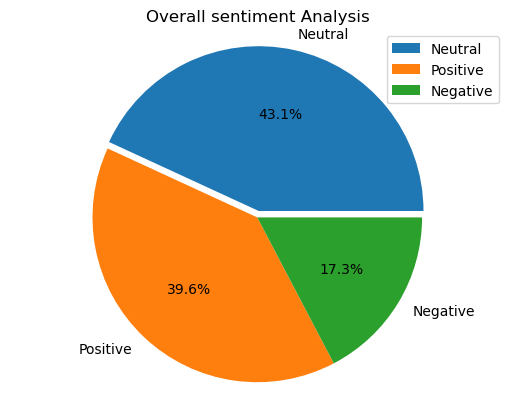

<Figure size 640x480 with 0 Axes>

In [62]:
# Count the values in the column
# value_counts = df_tweets['Calculates_Sentiment'].value_counts()

# Plot a pie chart

ax = plt.pie(df_tweets['Sentiment'].value_counts(),
                labels=df_tweets['Sentiment'].value_counts().index,
                autopct='%1.1f%%',explode=(0.04,0,0))
plt.axis('equal')                             # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Overall sentiment Analysis')
plt.legend()
plt.show()
plt.savefig("sentiment_Analysis.png") 

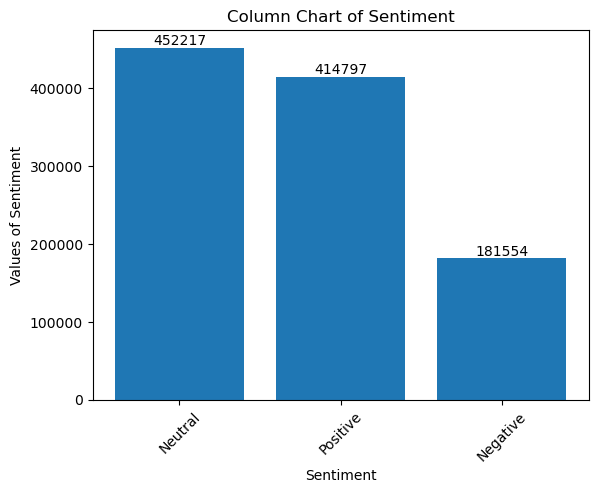

<Figure size 640x480 with 0 Axes>

In [63]:
# Plot a column chart
plt.bar(df_tweets['Sentiment'].value_counts().index, 
        df_tweets['Sentiment'].value_counts().values)

plt.xlabel('Sentiment')
plt.ylabel('Values of Sentiment')
plt.title('Column Chart of Sentiment')
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed

# Add labels to the chart
for i, count in enumerate(df_tweets['Sentiment'].value_counts().values):
    plt.text(i, count,str(count), ha='center', va='bottom')

plt.show()
plt.savefig("sentiment_Analysisbar.png") 

The plot indicates that the dataset is not balanced. 

### Dataset Sampling

To build and run an NLP forecasting model that can run easily and quickly on our machine, the random sampling technique was applied to reduce the dataset size. The reduced dataset is about one-third of the size of the main dataset df_tweets by selecting 100,000 samples from each sentiment, positive, neutral, and negative.

In [64]:
# Separating positive, neutral, and negative tweets
tweets_pos= df_tweets[df_tweets['Sentiment'] == 'Positive']
tweets_neut= df_tweets[df_tweets['Sentiment'] == 'Neutral']
tweets_neg= df_tweets[df_tweets['Sentiment'] == 'Negative']  

In [65]:
# select a random sample from each dataset data_pos, data_neut, and data_neg
tweet_pos= tweets_pos.sample(n=100000)
tweet_neut= tweets_neut.sample(n=100000)
tweet_neg= tweets_neg.sample(n=100000) 

In [66]:
tweet_pos.head(2)

Date                                       CleanedTweet  \
844441 2022-04-16 23:59:36  respect strong women stand everyone tries brin...   
461381 2022-08-04 23:59:43  presale time approaching let join journey prom...   

        Subjectivity  Polarity Sentiment  
844441      0.594444  0.227778  Positive  
461381      0.250000  0.100000  Positive

In [67]:
tweet_neut.head(2)

Date                               CleanedTweet  \
524850 2022-09-15 23:59:36  start playing ow kiriko https co ngwdqrpo   
688298 2022-12-02 23:59:36                       gonna giving sweater   

        Subjectivity  Polarity Sentiment  
524850           0.0       0.0   Neutral  
688298           0.0       0.0   Neutral

In [68]:
tweet_neg.head(2)

Date                  CleanedTweet  Subjectivity  \
715090 2022-12-20 23:59:37      violence fiend goes hard      0.541667   
321513 2022-05-03 23:59:52  red flags look green guerita      0.150000   

        Polarity Sentiment  
715090 -0.291667  Negative  
321513 -0.100000  Negative

In [69]:
# Combine the data_pos, data_neut, and data_neg together datasets in the new data set called as "Sampled_tweets"
Sampled_tweets = pd.concat([tweet_pos, tweet_neut, tweet_neg])

In [70]:
Sampled_tweets.head()

Date                                       CleanedTweet  \
844441 2022-04-16 23:59:36  respect strong women stand everyone tries brin...   
461381 2022-08-04 23:59:43  presale time approaching let join journey prom...   
186352 2022-02-02 23:59:54            violence lmao uh psa theezy cause lying   
428433 2022-07-13 23:59:43                                        dangle love   
118415 2022-11-17 23:59:34  make new buffalobills stadium convertible open...   

        Subjectivity  Polarity Sentiment  
844441      0.594444  0.227778  Positive  
461381      0.250000  0.100000  Positive  
186352      1.000000  0.600000  Positive  
428433      0.600000  0.500000  Positive  
118415      0.477273  0.068182  Positive

In [71]:
# Set 'timestamp' column as the DataFrame index
Sampled_tweets.set_index('Date', inplace=True) 

In [72]:
Sampled_tweets.head()

CleanedTweet  \
Date                                                                     
2022-04-16 23:59:36  respect strong women stand everyone tries brin...   
2022-08-04 23:59:43  presale time approaching let join journey prom...   
2022-02-02 23:59:54            violence lmao uh psa theezy cause lying   
2022-07-13 23:59:43                                        dangle love   
2022-11-17 23:59:34  make new buffalobills stadium convertible open...   

                     Subjectivity  Polarity Sentiment  
Date                                                   
2022-04-16 23:59:36      0.594444  0.227778  Positive  
2022-08-04 23:59:43      0.250000  0.100000  Positive  
2022-02-02 23:59:54      1.000000  0.600000  Positive  
2022-07-13 23:59:43      0.600000  0.500000  Positive  
2022-11-17 23:59:34      0.477273  0.068182  Positive

In [73]:
Sampled_tweets.describe()

Subjectivity       Polarity
count  300000.000000  300000.000000
mean        0.393896       0.017036
std         0.332178       0.328265
min         0.000000      -1.000000
25%         0.000000      -0.116667
50%         0.400000       0.000000
75%         0.639352       0.160000
max         1.000000       1.000000

In [74]:
Sampled_tweets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300000 entries, 2022-04-16 23:59:36 to 2022-11-16 23:59:33
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CleanedTweet  300000 non-null  object 
 1   Subjectivity  300000 non-null  float64
 2   Polarity      300000 non-null  float64
 3   Sentiment     300000 non-null  object 
dtypes: float64(2), object(2)
memory usage: 11.4+ MB


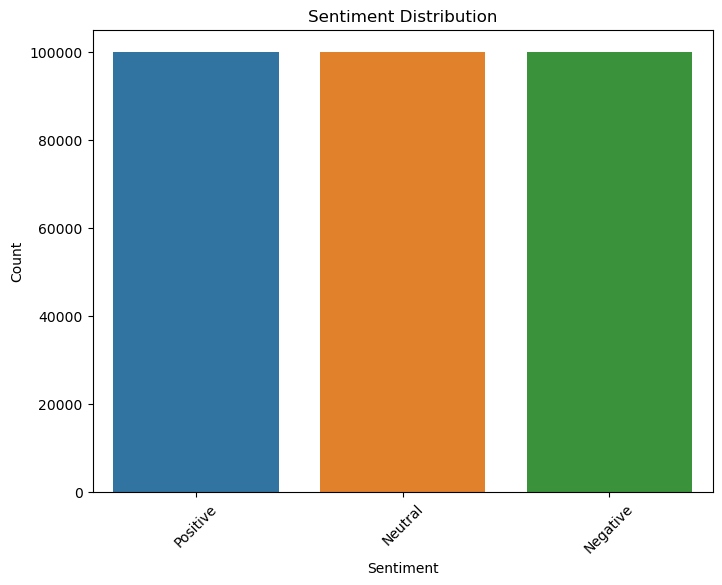

In [75]:
# Plotting count of each sentiment category
plt.figure(figsize=(8, 6))
sns.countplot(data=Sampled_tweets, x='Sentiment')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.show() 

A balanced dataset

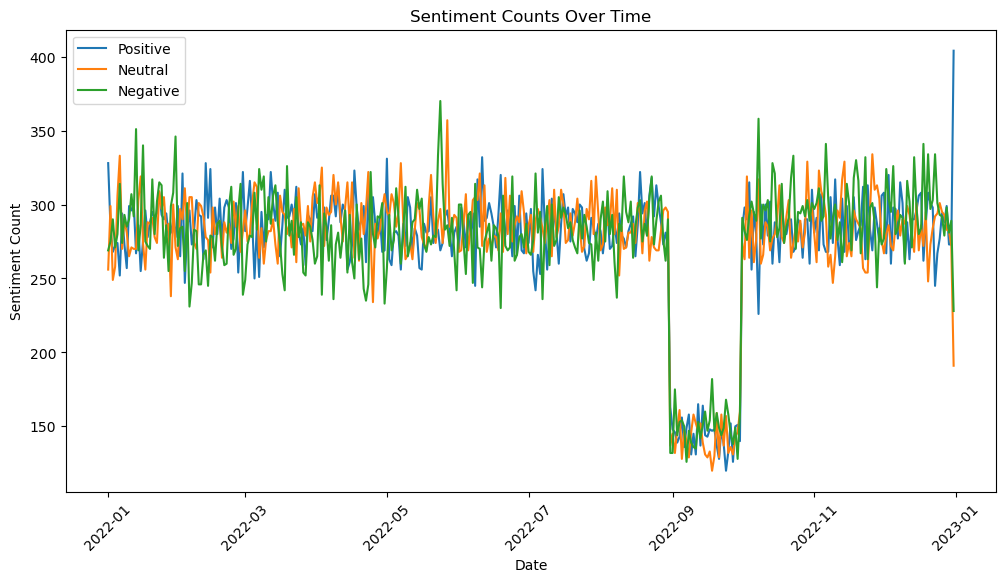

<Figure size 640x480 with 0 Axes>

In [76]:
# Aggregate sentiment counts by time and sentiment category
sentiment_counts = Sampled_tweets.groupby([pd.Grouper(freq='D'), 'Sentiment']).size().unstack()
# Plotting sentiment counts over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_counts, x=sentiment_counts.index, y='Positive', label='Positive')
sns.lineplot(data=sentiment_counts, x=sentiment_counts.index, y='Neutral', label='Neutral')
sns.lineplot(data=sentiment_counts, x=sentiment_counts.index, y='Negative', label='Negative')
plt.title('Sentiment Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()
plt.savefig("sentiment_Analysisline.png") 

The plot indicates that the data has noises, we can understand that our datasate has missing values. I means  and need further cleaning before applying ARIMA

In [77]:
# Create an interactive figure
import plotly.graph_objects as go
fig = go.Figure()
plt.figure(figsize=(12, 6))
# Add lines for each sentiment category
fig.add_trace(go.Scatter(x=sentiment_counts.index, y=sentiment_counts['Positive'], mode='lines', name='Positive'))
fig.add_trace(go.Scatter(x=sentiment_counts.index, y=sentiment_counts['Neutral'], mode='lines', name='Neutral'))
fig.add_trace(go.Scatter(x=sentiment_counts.index, y=sentiment_counts['Negative'], mode='lines', name='Negative'))

# Set layout options
fig.update_layout(
    title='Sentiment Counts Over Time',
    xaxis_title='Date',
    yaxis_title='Sentiment Count',
    xaxis=dict(tickangle=45),
#     legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)

# Show the interactive figure
fig.show() 

<Figure size 1200x600 with 0 Axes>

In [78]:
# Save interactive plot
import plotly.io as pio
pio.write_html(fig, file="SentimentInter.html", auto_open=True)

# Bag of Words using CountVectorizer

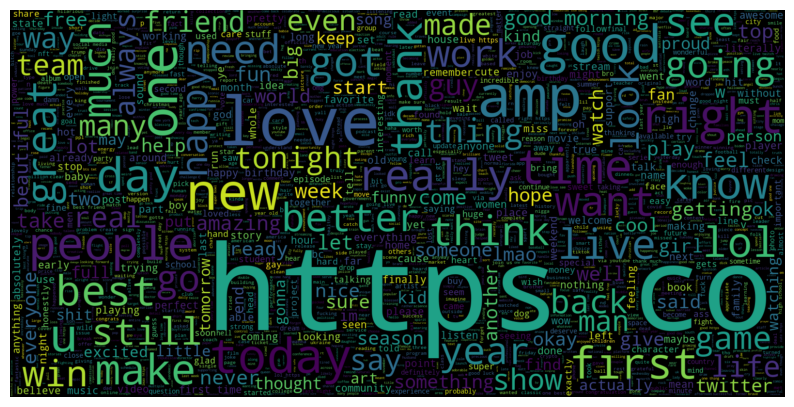

In [79]:
# Positive Words
# Generate the word cloud
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(Sampled_tweets[Sampled_tweets.Sentiment == "Positive"].CleanedTweet))
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

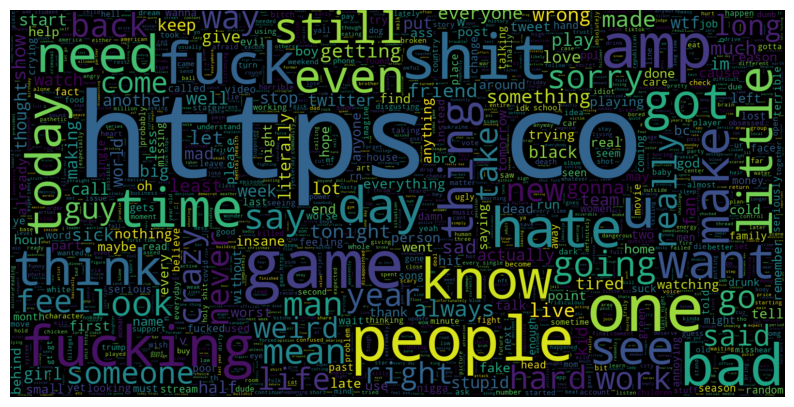

In [80]:
# Negativ Words
plt.figure(figsize = (10,6)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(Sampled_tweets[Sampled_tweets.Sentiment == "Negative"].CleanedTweet))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [81]:
Sampled_tweets

CleanedTweet  \
Date                                                                     
2022-04-16 23:59:36  respect strong women stand everyone tries brin...   
2022-08-04 23:59:43  presale time approaching let join journey prom...   
2022-02-02 23:59:54            violence lmao uh psa theezy cause lying   
2022-07-13 23:59:43                                        dangle love   
2022-11-17 23:59:34  make new buffalobills stadium convertible open...   
...                                                                ...   
2022-12-28 23:59:58  hey guys time horrible game play laughter come...   
2022-05-27 23:59:46                         feels bad https co fcrfzep   
2022-05-21 23:59:52  vintage wooden wall decorative plate round han...   
2022-08-08 23:59:49             stay hater talking shit media know mad   
2022-11-16 23:59:33  client accidentally broke favorite toy month s...   

                     Subjectivity  Polarity Sentiment  
Date                                                   
2022-04-16 23:59:36      0.594444  0.227778  Positive  
2022-08-04 23:59:43      0.250000  0.100000  Positive  
2022-02-02 23:59:54      1.000000  0.600000  Positive  
2022-07-13 23:59:43      0.600000  0.500000  Positive  
2022-11-17 23:59:34      0.477273  0.068182  Positive  
...                           ...       ...       ...  
2022-12-28 23:59:58      0.700000 -0.700000  Negative  
2022-05-27 23:59:46      0.666667 -0.700000  Negative  
2022-05-21 23:59:52      0.200000 -0.100000  Negative  
2022-08-08 23:59:49      0.900000 -0.412500  Negative  
2022-11-16 23:59:33      0.555303 -0.015909  Negative  

[300000 rows x 4 columns]

### calculate the tweet length and word count

In [82]:
# Calculating tweet’s lenght & word count
Sampled_tweets['tweetLen'] = Sampled_tweets['CleanedTweet'].astype(str).apply(len)
Sampled_tweets['tweeteWordCount'] = Sampled_tweets['CleanedTweet'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(Sampled_tweets.groupby('Sentiment').tweetLen.mean()),2)

tweetLen
Sentiment          
Negative      74.53
Neutral       45.77
Positive      80.72

In [83]:
round(pd.DataFrame(Sampled_tweets.groupby('Sentiment').tweeteWordCount.mean()),2)

tweeteWordCount
Sentiment                 
Negative             11.42
Neutral               6.95
Positive             12.20

In [84]:
Sampled_tweets.head()

CleanedTweet  \
Date                                                                     
2022-04-16 23:59:36  respect strong women stand everyone tries brin...   
2022-08-04 23:59:43  presale time approaching let join journey prom...   
2022-02-02 23:59:54            violence lmao uh psa theezy cause lying   
2022-07-13 23:59:43                                        dangle love   
2022-11-17 23:59:34  make new buffalobills stadium convertible open...   

                     Subjectivity  Polarity Sentiment  tweetLen  \
Date                                                              
2022-04-16 23:59:36      0.594444  0.227778  Positive        86   
2022-08-04 23:59:43      0.250000  0.100000  Positive       121   
2022-02-02 23:59:54      1.000000  0.600000  Positive        39   
2022-07-13 23:59:43      0.600000  0.500000  Positive        11   
2022-11-17 23:59:34      0.477273  0.068182  Positive        81   

                     tweeteWordCount  
Date                                  
2022-04-16 23:59:36               13  
2022-08-04 23:59:43               18  
2022-02-02 23:59:54                7  
2022-07-13 23:59:43                2  
2022-11-17 23:59:34               11

The tweet word count is calculated to be used later with the ARIMA model for forecasting.

The <b>pair plot</b> is a tool that enables us to analyze and identify the optimal combination of features for explaining the relationship between two variables or creating distinct clusters. It is particularly useful for constructing basic classification models by visualizing straightforward lines or achieving linear separation within our dataset.

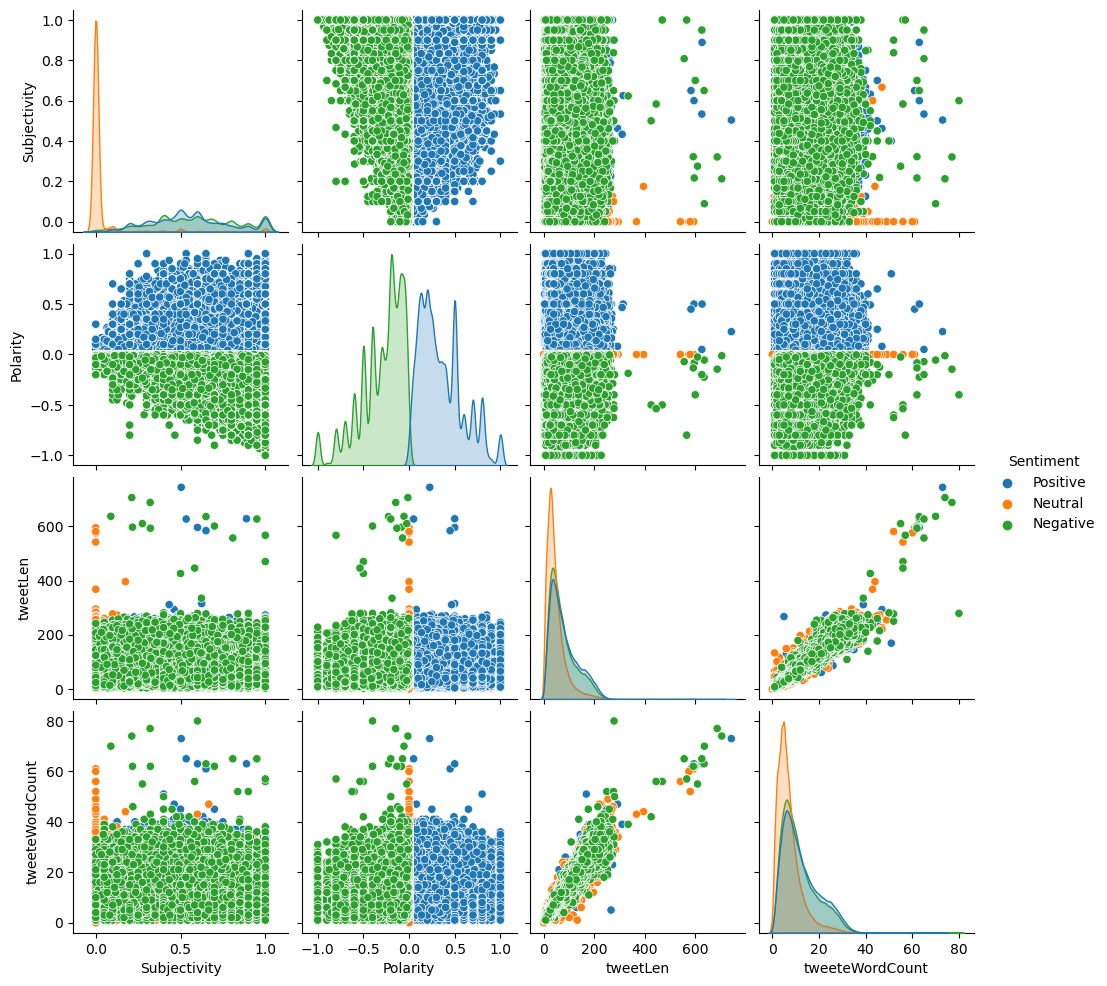

In [85]:
#Exploring dataset:
sns.pairplot(Sampled_tweets, kind="scatter", hue="Sentiment")
plt.show()

he distribution of each feature appears on the main diagonal subplots. While the correlations between each of the two variables are depicted by the scatter plots on the upper and bottom triangles 

In [86]:
# Save The cleaned file to 'Cleantweets_WithoutSentiment.csv'
Sampled_tweets.to_csv('SentimentWordLen.csv', index=True)

<br>
<br>

## Multiclass Logistic Regression
Multiclass Logistic Regression was used to classify the tweet sentiment into three classes: positive, negative, and neutral. 

# Model Training

In [87]:
# Store the column of the dataframe named as "cleanedtext" as X
X = Sampled_tweets['CleanedTweet']

# Display the value "X"
print(X)

Date
2022-04-16 23:59:36    respect strong women stand everyone tries brin...
2022-08-04 23:59:43    presale time approaching let join journey prom...
2022-02-02 23:59:54              violence lmao uh psa theezy cause lying
2022-07-13 23:59:43                                          dangle love
2022-11-17 23:59:34    make new buffalobills stadium convertible open...
                                             ...                        
2022-12-28 23:59:58    hey guys time horrible game play laughter come...
2022-05-27 23:59:46                           feels bad https co fcrfzep
2022-05-21 23:59:52    vintage wooden wall decorative plate round han...
2022-08-08 23:59:49               stay hater talking shit media know mad
2022-11-16 23:59:33    client accidentally broke favorite toy month s...
Name: CleanedTweet, Length: 300000, dtype: object


In [88]:
# Store the column 'target' of the dataframe named as y
y = Sampled_tweets.Sentiment

# Display the "sentiment"
print(y)

Date
2022-04-16 23:59:36    Positive
2022-08-04 23:59:43    Positive
2022-02-02 23:59:54    Positive
2022-07-13 23:59:43    Positive
2022-11-17 23:59:34    Positive
                         ...   
2022-12-28 23:59:58    Negative
2022-05-27 23:59:46    Negative
2022-05-21 23:59:52    Negative
2022-08-08 23:59:49    Negative
2022-11-16 23:59:33    Negative
Name: Sentiment, Length: 300000, dtype: object


In [89]:
# Train/Test/Split

 train_test_split function, it is important to shuffle the dataset before splitting it into training and testing datasets. Shuffling the dataset helps ensure that the data points are randomly distributed across the train and test sets, which reduces the potential for any bias or patterns in the original order of the data to affect the model's performance.

In [90]:
# Splitting the 80% data for training data and 20% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state =26105111)

In [91]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240000,), (60000,), (240000,), (60000,))

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver='lbfgs')

from sklearn.pipeline import Pipeline

In [93]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [94]:
predictions = model.predict (X_test)
confusion_matrix(predictions,y_test)

array([[19015,   174,   683],
       [  473, 19883,   548],
       [  536,    81, 18607]], dtype=int64)

In [96]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    Negative       0.96      0.95      0.95     20024
     Neutral       0.95      0.99      0.97     20138
    Positive       0.97      0.94      0.95     19838

    accuracy                           0.96     60000
   macro avg       0.96      0.96      0.96     60000
weighted avg       0.96      0.96      0.96     60000



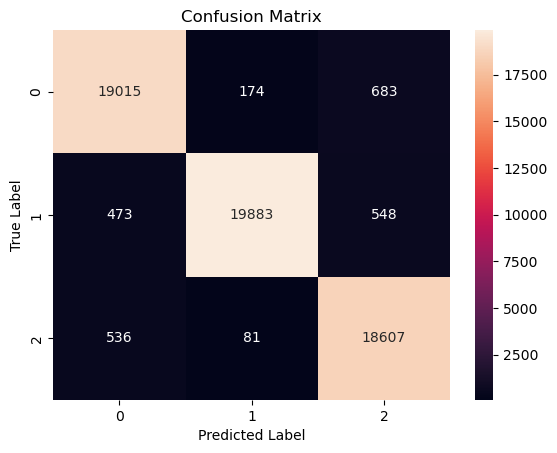

In [97]:
cm = confusion_matrix(predictions,y_test)
# Plot the confusion matrix
sns.heatmap(cm, annot=True,fmt="d")     # fmt='d' to format the cell values as integers 
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()  

## Reference: 
<p>https://medium.com/swlh/tweet-sentiment-analysis-using-python-for-complete-beginners-4aeb4456040</p>
<p>https://www.kaggle.com/code/paulpidou/nlp-beginner-text-classification-using-lstm</p>
